In [3]:
import tensorflow  as tf
import numpy as np 
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import imutils
from imutils.contours import sort_contours

In [5]:
model = tf.keras.models.load_model('./models/second_model.h5')

name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
len(name_labels)

36

1/1 [==============================] - 0s 19ms/step
['R', 'P', 'E', 'R', 'S', 'E', 'P', 'G', 'U', 'U', 'E', 'N', 'S', 'T', 'T', 'A', 'A', 'A', '1', 'B', '2', 'C', '3', 'D', '4', 'E', '5']


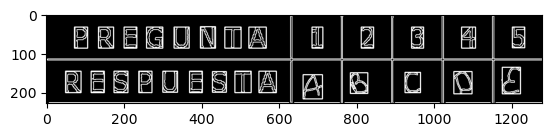

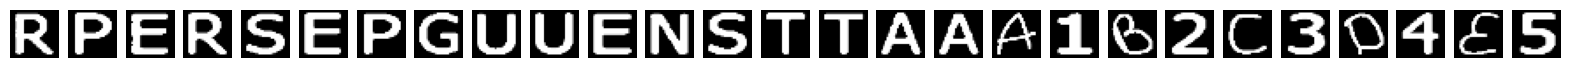

In [6]:
def preprocessing_img(path_img):
    img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY) 
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    # thresh = cv2.erode(thresh, np.ones((3,3), np.uint8))

    thresh = cv2.Canny(thresh, 40, 150)
    thresh = cv2.dilate(thresh, np.ones((2,2), np.uint8))
    # thresh = cv2.GaussianBlur(thresh, (5,5), 0)

    return img, thresh

gray, thresh = preprocessing_img(path_img='./images/image_test_9.jpg')

    
def find_contours(img):
    img_copy = img.copy()
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    min_w, max_w = 5, 90
    min_h, max_h = 10, 90 
    n = 5
    letters = []
    conts_2 = []
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= min_w and w < max_w) and (h >= min_h and h < max_h):
            img_p = gray[y-n : y+h+n,   x-n : x+n+w ]
            cv2.rectangle(img_copy, (x,y), (x+w, h+y), (255,100,0),2)
            img_p = cv2.threshold(img_p, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img_p = cv2.dilate(img_p, np.ones((2,2), np.uint8 ))
            letters.append(img_p)
            conts_2.append(c)
    plt.imshow(img_copy, cmap='gray');
    return letters, conts_2


def img_prediction(img, model, name_labels):
    img = cv2.resize(img, (28,28))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))

    prediction = model.predict(img)
    prediction = name_labels[np.argmax(prediction)]

    return prediction


letters = find_contours(thresh)[0]

img_predictions = []
for letter in letters:
    img = img_prediction(letter, model, name_labels)
    img_predictions.append(img)

print(img_predictions)

fig, axes = plt.subplots(1, len(letters), figsize=(20,5) )

for i, letter in enumerate(letters):
    letter = cv2.resize(letter, (28,28))
    axes[i].imshow(letter, cmap='gray')

    axes[i].axis('off')

Tipo de letra 
**TAHOMA**

Tamaño 
**16**

Palabras de pregunta y respuestas separadas por espacio cada letra

**P R E G U N T A**


**R E S P U E S T A**

Ancho de columna lo suficiente para que quepa una letra sin estar muy cerca a los bordes

* Problemas entre el número de opciones 


In [7]:
question_row = []
answer_row = []
for i in range(len(img_predictions)):
    if i%2 == 0:
        question_row.append(img_predictions[i])
    else:
        answer_row.append(img_predictions[i])

question_row, answer_row


(['R', 'E', 'S', 'P', 'U', 'E', 'S', 'T', 'A', '1', '2', '3', '4', '5'],
 ['P', 'R', 'E', 'G', 'U', 'N', 'T', 'A', 'A', 'B', 'C', 'D', 'E'])

1/1 [==============================] - 0s 21ms/step
['R', 'E', 'S', 'P', 'U', 'E', 'S', 'A', 'A', 'C', 'D', 'E', 'B', 'A', 'C'] ['P', 'R', 'E', 'G', 'U', 'N', 'T', 'A', '1', '2', '3', '4', '5', 'S', '7']
ACDEBAC 12345S7
0 6
ACDEBAC


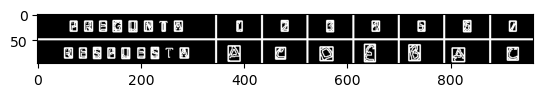

In [8]:
import tensorflow  as tf
import numpy as np 
import pandas as pd
import cv2
import imutils
from imutils.contours import sort_contours

import tensorflow as tf 
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

model = load_model('./models/second_model.h5')

def names_label():
    names = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    names = [label for label in names]
    return names 


def prepro_img(path_img):
    gray = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY)
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    img = cv2.Canny(img, 40, 150)
    img = cv2.dilate(img, np.ones((2,2), np.uint8))
    return gray, img


def find_contours(img, gray):
    img_copy = img.copy()
    gray = np.array(gray)
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    min_w, max_w = 5, 90
    min_h, max_h = 10, 90 
    n = 5
    letters = []
    conts_2 = []
    
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= min_w and w < max_w) and (h >= min_h and h < max_h):
            img_p = gray[y-n : y+h+n,   x-n : x+n+w ]
            cv2.rectangle(img_copy, (x,y), (x+w, h+y), (255,100,0),2)
            img_p = cv2.threshold(img_p, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img_p = cv2.dilate(img_p, np.ones((2,2), np.uint8 ))
            letters.append(img_p)
            conts_2.append(c)
    plt.imshow(img_copy, cmap='gray');
    return letters, conts_2





def img_prediction(img, model, name_labels):
    img = cv2.resize(img, (28,28))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))

    prediction = model.predict(img)
    prediction = name_labels[np.argmax(prediction)]

    return prediction



def letter_pred(img, gray):
    names = names_label()
    letters = find_contours(img, gray)[0]
    img_pred = [img_prediction(letter, model, names) for letter in letters]
    question_row = []
    answer_row = []
    for i in range(len(img_pred)):

        img_pred[i] = 'o' if img_pred[i] == '0' else img_pred[i]
        img_pred[i] = 'A' if img_pred[i] == 'H' else img_pred[i]
        

        if i%2 == 0:                
            question_row.append(img_pred[i])
            
        else:
            answer_row.append(img_pred[i])
            # print(img_pred[i])


    print(question_row, answer_row)
    box_q = ['RESPUESTA', 'RE5PUESTA', 'REPUETA', 'RESPUESTA', 'RESPUESA']
    box_a = ['PREGUNTA', 'PREGUNA', 'REPUETA', 'RESPUESA']
    
    response_q = ''.join([i for i in question_row])
    response_a = ''.join([i for i in answer_row])

    for i in box_q:
        if i in response_q:
            response_q = response_q.replace(i, '')

    for i in box_a:
        if i in response_a:
            response_a = response_a.replace(i, '')

  
    counter_q = 0
    for i in response_q:
        if i.isdigit():
            counter_q += 1
    print(response_q, response_a)
    
    counter_a = 0
    for i in response_a:
        if i.isdigit():
            counter_a += 1
    print(counter_q, counter_a)


    if counter_a > counter_q:
        print(response_q)
        return response_q
    
    else:
        print(response_a)
        return response_a
    


gray, img = prepro_img('./images_test/image_3.png')

answer_row = letter_pred(img, gray)





In [17]:
import pandas as pd

validation = '''  ababcda  bcdabca. Acdebac. Eeeeeee. Abababa  acbacba  abcdeab. Dcbaabc. Adbcade. Abcdead. Abcdeac  eabcdea. Aaaaaaa  eabcdea. Edabcde. Eabcdea. Abcdeba. Bcadeab. Abcdbae. Abababa. Cacacac. Abcddab. Baabada. Abcdbad. Cddbbad. Addbbac. Ccccccc. Abbacab. Bbdcbdb. Acdbbdc. Acbddbc. Abcdbdd. Bbbbbbb. Abcabca. Bdcabdc. Abcabda. Addbadd. Dbbdbac. Abdcabd  abcddea. Abccbaa  bdabeeb. Debaeba. Aebcdab. Bdbbbda. Abcdeeb. Adebeeb.'''

validation = validation.upper().split(' ')
validation_2 = []

for i in validation:
    if len(i) > 0:
        i  = i.replace('.', '')
        validation_2.append(i)

val = [ [] for i in range(len(validation_2))]    
for list in range(len(validation_2)):
    for element in validation_2[list]:
        val[list].append(element)
val
df_val = {1+i:val[i] for i in range(len(val))}
df_val = pd.DataFrame(df_val).T
df_val.head()

,0,1,2,3,4,5,6
1,A,B,A,B,C,D,A
2,B,C,D,A,B,C,A
3,A,C,D,E,B,A,C
4,E,E,E,E,E,E,E
5,A,B,A,B,A,B,A


In [45]:
import os 

x = os.listdir('./images_test')

for i in range(len(x)):
    new_name = os.path.join(os.path.join('./images_test'), f'image_0{i+1}.png')
    os.rename(os.path.join('./images_test', x[i]), new_name )
print(len(x))

47


In [11]:
x = os.listdir('./images_test')
len(x)

47

1/1 [==============================] - 0s 18ms/step
['R', 'E', 'S', 'P', 'U', 'E', 'S', 'A', '1', 'Z', '3', '4', '5', 'G', '7'] ['P', 'R', 'E', 'G', 'U', 'N', 'A', 'A', 'B', 'A', 'B', 'C', 'D', 'A']
1Z345G7 ABABCDA
5 0
ABABCDA
********** ABABCDA **********
********** 1 **********
********** ./images_test\image_01.png **********
1/1 [==============================] - 0s 19ms/step
['R', 'E', 'S', 'P', 'U', 'E', 'S', 'A', 'B', 'C', 'A', 'D', 'E', 'A', 'B'] ['P', 'R', 'E', 'G', 'U', 'N', 'T', 'A', '1', '2', '3', '4', '5', 'S', '7']
BCADEAB 12345S7
0 6
BCADEAB
********** BCADEAB **********
********** 2 **********
********** ./images_test\image_010.png **********
1/1 [==============================] - 0s 18ms/step
['R', 'E', 'S', 'P', 'U', 'E', 'S', 'A', 'A', 'P', 'C', 'D', 'B', 'A', 'E'] ['P', 'R', 'E', 'G', 'U', 'N', 'T', 'A', '1', '2', '3', '4', '5', 'S', '7']
APCDBAE 12345S7
0 6
APCDBAE
********** APCDBAE **********
********** 3 **********
********** ./images_test\image_011.png *********

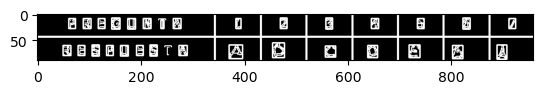

In [46]:
validation = [ i for i in validation if i != '' ]
validation = [[j for j in i] for i in validation]

import os 

files = os.listdir(path='./images_test')

response = []
names_images = []
counter = 1
for file in files:
    file = os.path.join('./images_test', file)
    gray, img = prepro_img(file)
    answer_row = letter_pred(img, gray)
    response.append(answer_row)
    names_images.append(file)
    print('*'*10, answer_row,'*'*10)
    print('*'*10, counter,'*'*10)
    print('*'*10, file,'*'*10)
    counter+=1
    
response = [[j for j in i] for i in response]
response = response[::-1]

In [47]:
names_df = [f'{i+1}' for i in range(len(names_images))]

df_val.index = names_df


names_copy = names_images.copy()
for i in range(len(names_copy)):
    
    names_copy[i] = str(names_copy[i])
    names_copy[i] = names_copy[i][20:]
    names_copy[i] = int(names_copy[i].replace('.png', ''))
    # print(str(names_copy[i]))

response_df = pd.DataFrame(response, index=names_copy)
response_df = response_df.drop(columns=7)
response_df

,0,1,2,3,4,5,6
1,A,O,C,D,E,B,A
10,E,A,B,C,D,E,A
11,E,D,A,B,C,D,E
12,E,A,B,C,D,E,A
13,1,2,3,A,A,A,A
14,A,D,B,C,A,D,E
15,D,C,B,A,A,B,C
16,A,B,C,P,E,A,D
17,A,C,B,A,C,D,A
18,D,B,A,B,A,B,A


In [48]:
df_val.head()

,0,1,2,3,4,5,6
1,A,B,A,B,C,D,A
2,B,C,D,A,B,C,A
3,A,C,D,E,B,A,C
4,E,E,E,E,E,E,E
5,A,B,A,B,A,B,A


In [49]:
response_df = response_df.sort_index(ascending=True)
response_df

,0,1,2,3,4,5,6
1,A,O,C,D,E,B,A
2,T,B,C,D,E,E,B
3,A,D,D,B,A,P,D
4,A,B,B,A,C,A,B
5,A,B,A,B,A,B,A
6,B,C,D,A,B,C,A
7,A,P,C,D,B,A,E
8,B,C,A,D,E,A,B
9,A,B,A,B,C,D,A
10,E,A,B,C,D,E,A
